<a href="https://colab.research.google.com/github/xeniawym/Analysis-on-Current-Think-Tank-Discourse-Regarding-Deep-Seabed-Mining/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis on Current Think Tank Discourse Regarding Deep Seabed Mining**


# ***Introduction***

Deep sea mining (DSM) refers to the extraction of valuable minerals and resources from the ocean floor at depths typically greater than 200 meters (656 feet). This relatively new and evolving industry focuses on harvesting a wide range of materials, including precious metals like gold and silver, industrial metals like copper and nickel, rare earth elements, and even minerals used in energy production, such as cobalt and lithium. Deep sea mining operations involve specialized technology and equipment to access these resources, which are often found in polymetallic nodules, hydrothermal vents, and cobalt-rich ferromanganese crusts on the ocean floor. While it holds the promise of accessing valuable resources to meet growing global demand, deep sea mining also raises significant environmental and ethical concerns due to its potential impact on fragile and unique marine ecosystems.

Current regulations on deep sea mining are still under debate and the International Seabed Authority(ISA) is the primary international organization responsible for regulating deep sea mining in areas beyond national jurisdiction. It was established under the United Nations Convention on the Law of the Sea (UNCLOS), which the U.S. is not a part of. Regarding this policy gap, think tanks across the political spectrum have published podcasts, op-eds and articles to influence policy to shed light on different aspects of deep sea mining and to influence U.S. domestic and international policy.


As deep sea mining is a nascent industry, it first appeared in the 1980s and died down in the 2000s and recently made a huge come-back as the green energy transition initiatives became a key concern of many countries. Past debates concentrated on the technological and economic feasibility of deep sea mining, the potential environmental impacts, international collaborations and long-term sustainability. Recent debates show a shift to questions about legal framework, new concept of the rights of environment and the rights of the common, social and community impacts and unequal cost/impact bearing among different regions. Critical mineral related national security, international competition also appeared in recent discussions.

2023 is a crucial year because it marks the beginning of international law and policy making about deep sea mining. ISA was mandated by international law to come up with a regulation framework by July 2023. At the deadline, the ISA Council reached a decision that repeated governments’ unwillingness to green-light deep sea mining without any rules. However, The Medals Company, a Canadian company that has been pushing forward deep sea mining,  subsequently announced it will apply for an exploitation contract after the ISA’s meeting in July 2024, irrespective of whether governments have completed their work or not. Therefore, it is imperative to examine think tank publications after July 2023 to gain an understanding of ongoing topics, major arguments, stakeholders, leading institutions on this topic.

# ***Project Design***

This project intends to conduct an analysis on the current discourse trend of deep sea mining in think tanks across the political spectrum based on the Citizen Source website listing. The author did research on all of the think tank websites listed. 3 conservative think tanks: American Enterprise Institute (AEI), Hoover Institution, Heritage Foundation and 5 centrist and liberal think tanks: Carnegie Endowment for International Peace, Center for Strategic and International Studies, Wilson Center and Pew Charitable Trust, Scientific America have published on this topic and therefore this project will devote a special focus on these 8 institutes.

This project will manually collect all publications about deep sea mining from the aforementioned 8 think tanks, that are representative of different political tendencies. The analysis will focus on publications after July 2023. This project intends to look at 5 key questions:
1. What are current debates about?
2. What are the key words/phrases associated with deep sea mining?
3. How do conservative and liberal/centrist think tanks' perspectives on this matter vary?
4. Which organizations or institutions are at the forefront of research in this area?
5. What is the prevailing attitude or perspective toward deep sea mining in think tank publications?




## ***Data Preparation***

This step is to scrap all web, pdf and text files content and add a column into the original csv file for future usage.

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
# publications_df = pd.read_csv("/content/drive/MyDrive/Python_Final/DSM.csv", delimiter =",", encoding = 'utf-8')
# publications_df

In [ ]:
!pip install PyMuPDF #PyMuPDF library to read pdf
import io
import os
import fitz

In [ ]:
def scrape_article(URL):
    response = requests.get(URL)
    content_type = response.headers.get('Type', '').lower()
    if 'pdf' in content_type:
        with io.BytesIO(response.content) as f:
            doc = fitz.open(stream=f, filetype="pdf")
            pdf_text = ""
            for page in doc:
                pdf_text += page.get_text()
            return pdf_text
    else:
        response.encoding = 'utf-8'
        html_string = response.text
        soup = BeautifulSoup(html_string, 'html.parser')
        return soup.get_text()

Because there are several website returned 403 Forbidena and unreadable files. I mannually cleaned the csv up and added articles that are inretrievable.


In [ ]:
publications_cleaned_df = pd.read_csv("/content/drive/MyDrive/Python_Final/yimings/DSM_New.csv", delimiter =",", encoding = 'utf-8')
publications_cleaned_df


## ***Clean the Data***

In [ ]:
publications_cleaned_df['text'] =publications_cleaned_df['text'].map(str).apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
publications_cleaned_df['text'] = publications_cleaned_df['text'].str.replace('\n', ' ')
publications_cleaned_df

In [ ]:
publications_cleaned_df['Date'] = pd.to_datetime(publications_cleaned_df['Date'], format = '%d-%b')

In [ ]:
# publications_cleaned_df['date'] = pd.to_datetime(publications_cleaned_df['date'], format = '%m/%d/%y')

In [ ]:
publications_cleaned_df.dtypes

Date              datetime64[ns]
Publisher                 object
Type                      object
Title                     object
Primary Author            object
URL                       object
text                      object
dtype: object

## ***Grouping and Exploring Data***

From the result we could see that articles are still the most common type when it comes to DSM discussion. Podcasts are gaining popularity. There is one direct statement supporting a memorandum.

In [100]:
grouped_df = publications_cleaned_df.groupby(['Publisher', 'Type'])['text'].apply(' '.join).reset_index()
grouped_df = grouped_df.sort_values(by='Type', ascending=False)
grouped_df

Publisher        Type  \
18                       Wilson  transcript   
14                          Pew  statements   
10                     Heritage     podcast   
16                         WBUR     podcast   
1                           AEI     podcast   
11                       Hoover         pdf   
13                          Pew         pdf   
5                      Carneige  commentary   
15                        SCIAM  commentary   
12                          Pew  commentary   
17                       Wilson     article   
0                           AEI     article   
9                      Heritage     article   
8   Havard International Review     article   
7                Foreign Policy     article   
6           Environment America     article   
4                      Carneige     article   
3                          CSIS     article   
2                          C&en     article   
19         Yale Environment 360     article   

                                                 text  
18  good afternoon everybody thank you so much for...  
14  Pew Bertarelli Ocean Legacy Praises New Caledo...  
10  What Do Wildfires and Hurricanes Say About Cli...  
16  Deep-sea mining: Climate solution or ecologica...  
1                                                 nan  
11  Deep-sea mining tussle pits France and Germany...  
13  This discussion paper has been developed by th...  
5   As COP28 approaches, Pacific Island officials ...  
15  Mining the seaoor could boost global productio...  
12  Seabed Mining Moratorium Is Legally Required b...  
17   China Leads the Race to the Bottom: Deep Sea ...  
0   A Few Quick Questions for  Economist Ian Lange...  
9   China Is Determined To Push Its Way Into the A...  
8   Deep Sea Mining and the Green Transition US Eu...  
7   Deep-Sea Mining: Will ISA Regulatory Deadline ...  
6   The deep sea is one of the most mysterious pla...  
4   Over the next few decades, emerging markets wi...  
3   Deep Blue Scars: Environmental Threats to the ...  
2   The deep-sea mining dilemma Advertisement ACS ...  
19  Deep-Sea Mining Spurs Fish to Vacate Mining Si...

## ***Exploring  Data***

From the results we could see that AEI, a conservative think tank published most after July 1st 2023, followed by Pew, a centrist think tank. All other think tanks only published limited contents. James Pethokoukis, Julian Jackson are active authors on this topic.

In [101]:
author_counts = publications_cleaned_df.groupby(['Primary Author', 'Publisher']).size().reset_index(name='count')
author_counts = author_counts.sort_values(by='count', ascending=False)

author_counts


Primary Author                    Publisher  count
6       James Pethokoukis                          AEI      4
7          Julian Jackson                          Pew      3
0            Christina Lu               Foreign Policy      1
10            Monica Sato                         CSIS      1
15             URI DADUSH                     Carneige      1
14       SATYENDRA PRASAD                     Carneige      1
13           Ryan Murdock  Havard International Review      1
12        Priyanka Runwal                         C&en      1
11        OLIVE HEFFERNAN                        SCIAM      1
8             Kelsey Lamp          Environment America      1
9             Kenza Bryan                       Hoover      1
1           Daniel Kochis                     Heritage      1
5        Hilary McQuilkin                         WBUR      1
4            Greg O’Brien                       Wilson      1
3       Giuseppe Di Carlo                          Pew      1
2   Diana Furchtgott-Roth                     Heritage      1
16           Yiming Zhong                       Wilson      1

In [102]:
counts = publications_cleaned_df.groupby(['Publisher', 'Type']).size().reset_index(name='count')
counts

Publisher        Type  count
0                           AEI     article      3
1                           AEI     podcast      1
2                          C&en     article      1
3                          CSIS     article      1
4                      Carneige     article      1
5                      Carneige  commentary      1
6           Environment America     article      1
7                Foreign Policy     article      1
8   Havard International Review     article      1
9                      Heritage     article      1
10                     Heritage     podcast      1
11                       Hoover         pdf      1
12                          Pew  commentary      2
13                          Pew         pdf      1
14                          Pew  statements      1
15                        SCIAM  commentary      1
16                         WBUR     podcast      1
17                       Wilson     article      1
18                       Wilson  transcript      1
19         Yale Environment 360     article      1

# ***Number of Publications Across Time***

From the result we could see that the number of publications reached a peak in July when the ISA negotiation took place. And after a dip in August, publication number increased. In recent months, because there is no significant improvement in DSM policy making, less contents were published.


<Axes: title={'center': 'Number of Publications by Month'}, xlabel='Date', ylabel='Value'>

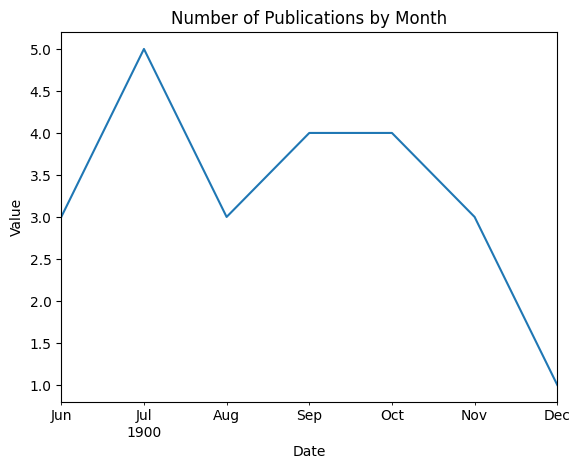

In [ ]:
#setting index as date so we can plot the data

linegraph = publications_cleaned_df.set_index('Date').groupby(pd.Grouper(freq='M')).size()

# adapted from here: https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year
linegraph.plot(kind='line', title='Number of Publications by Month', xlabel='Date', ylabel='Value')

# ***DATA Analysis***

# ***Word Clouds, Lexical Densities***

In this section, I looked at key words and lexical density. I first added stopwords and stored texts in a txt file. Then created word clouds for each file. In word clouds, we could see that conservative think tanks, Wilson, focus on the national security side of critical minerals. Words such as “China”, “critical minerals”, “Arctic competition”, “security”, “strategy” appeared frequently. And science-oriented think tanks used more words like “sea floor”, “species”, “impact”, “conservation”, and stressed on “data”. Liberal and centrist think tanks mentioned regional inequalities, economic aspects, and development impacts. Words such as “Pacific island”, “developing countries”, “global”, “income” are commonly used.

In [104]:
import nltk
from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import glob

In [105]:
for i, row in grouped_df.iterrows():

    soup = BeautifulSoup(row['text'])
    article = soup.get_text()

    publication = row['Publisher']
    doc_type = row['Type']


    # Use f-strings to create the file name
    file_name = f"/content/drive/MyDrive/Python_Final/yimings/files/{publication}_{doc_type}s.txt"

    with open(file_name, "w") as file:
        file.write(article)

In [107]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
stops = stopwords.words('english') #importing nltk's English stopwords
directory = '/content/drive/MyDrive/Python_Final/yimings/files'
files = glob.glob(f"{directory}/*.txt")

In [113]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


In [114]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

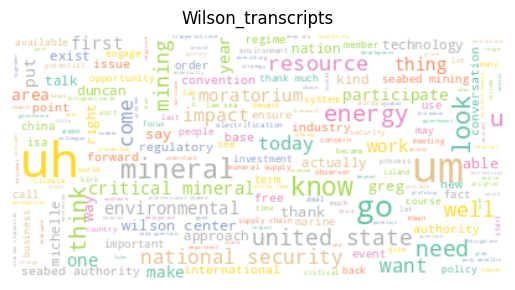

0.3409578270192995


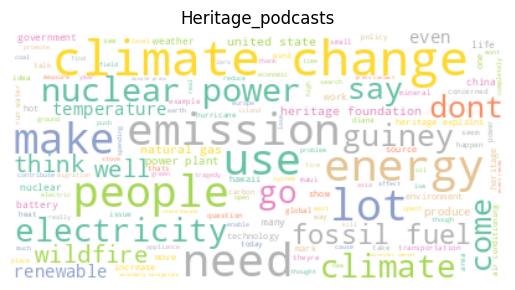

0.43048694424841216


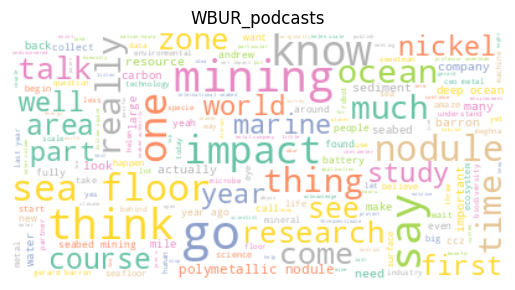

0.38744672607516467


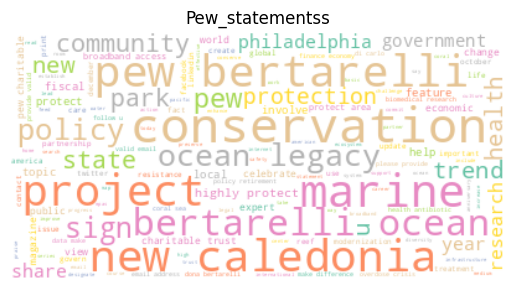

0.3633610900832703


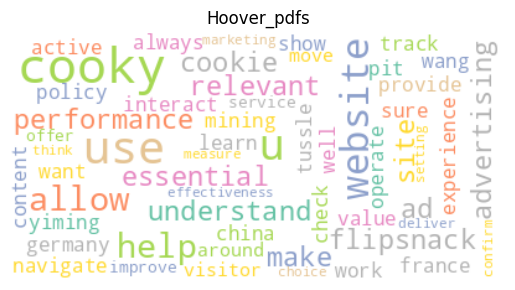

0.6477272727272727


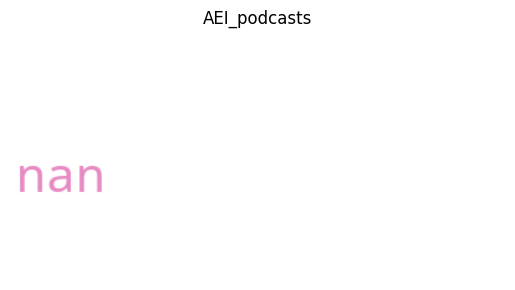

1.0


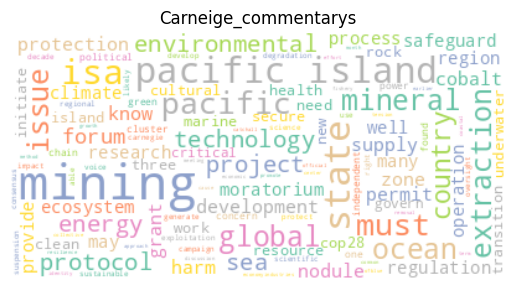

0.6206896551724138


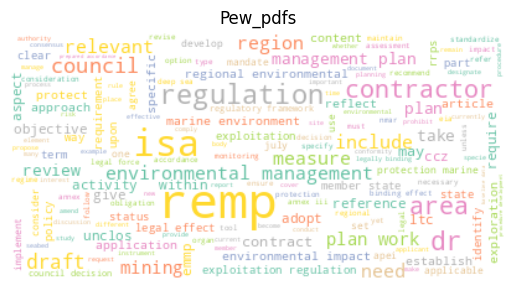

0.3335256780150029


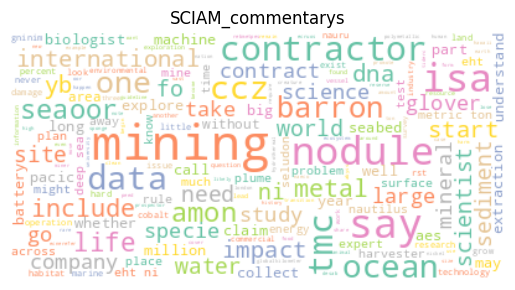

0.5098360655737705


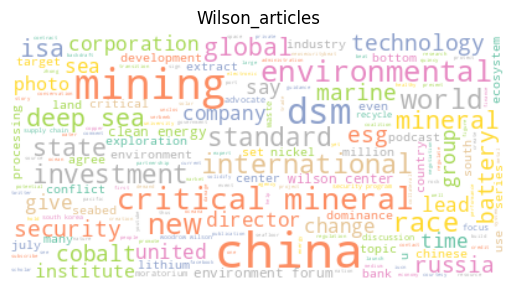

0.5808550185873605


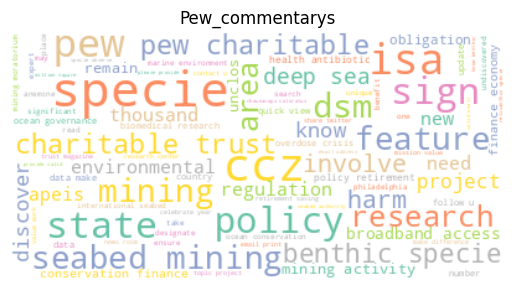

0.25353706847764573


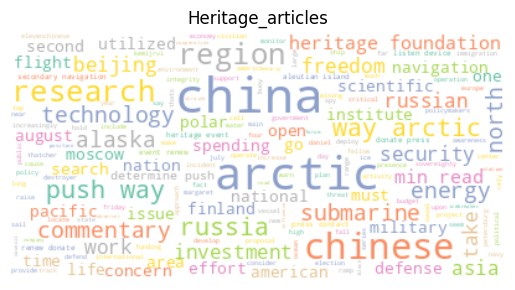

0.6069114470842333


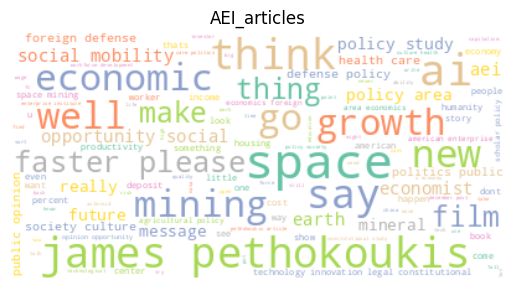

0.38205499276411


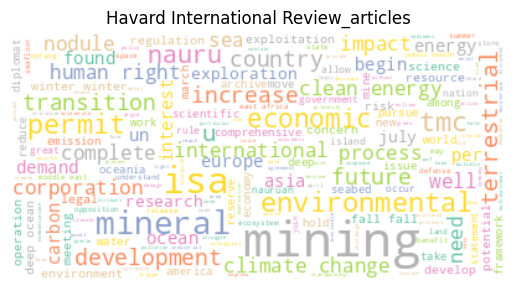

0.5515548281505729


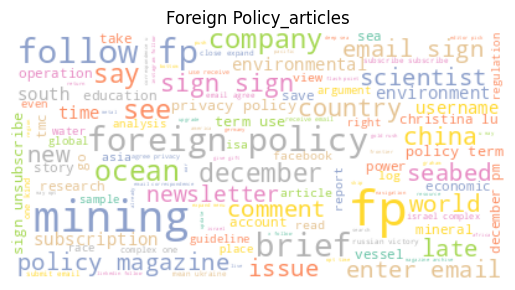

0.3948849104859335


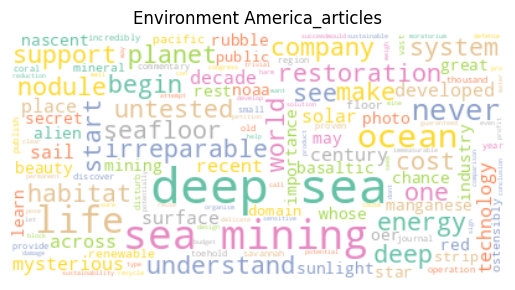

0.7128205128205128


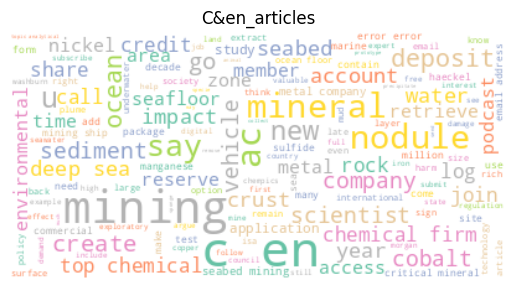

0.390198279087168


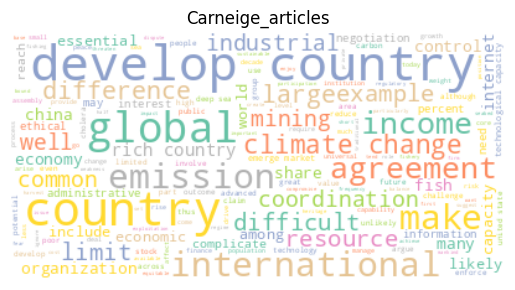

0.5344168260038241


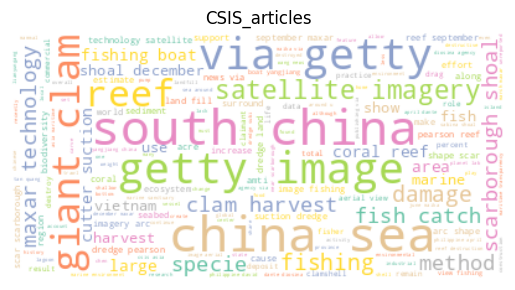

0.24624240486088902


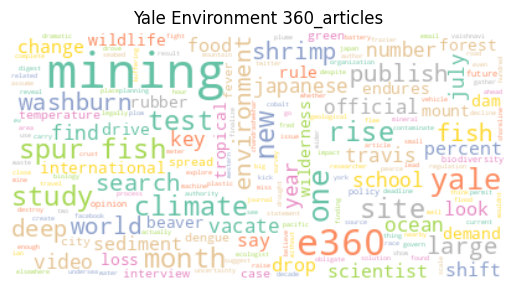

0.6545961002785515


In [115]:
# this function was taken from lecture
id = 0
lexical_density = []
for filepath in files:
    text = open(filepath, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stops]
    text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]

# save cleaned files
    file_name = filepath.split("/")[-1]
    file_name = file_name.split(".")[0]
    with open(f"/content/drive/MyDrive/Python_Final/yimings/files_cleaned/{file_name}.txt", "w") as file:
        file.write(str(text_clean))

# create Word Clouds

    unique_string=(" ").join(text_clean)
    wordcloud = WordCloud(max_font_size=40, background_color='white', colormap='Set2').generate(unique_string)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(file_name)
    plt.show()

# save Word Clouds
    wordcloud.to_file(f"/content/drive/MyDrive/Python_Final/yimings/wordclouds/wordcloud_{file_name}.png")

# lexical density
    ld_results = len(set(text_clean)) / len(text_clean) # unlike the lecture, I want to analyze the whole text, not just a slice
    print(ld_results)
    ld_dict = {'File_name': file_name, 'lexical_density': ld_results}
    lexical_density.append(ld_dict)

# ***Adding Stop Words***

In [116]:

author_list = []


for author in publications_cleaned_df['Primary Author']:
    if pd.isnull(author):
        continue
    else:
        first_name, last_name = author.split(' ', 1)
        if first_name.lower() not in author_list and last_name.lower() not in author_list:
            author_list.append(first_name.lower())
            author_list.append(last_name.lower())


In [121]:
stops = stopwords.words('english')

new_stopwords = ["deep sea mining", "institute", "institution", "policy", "center", "facebook", "contact", "aei",
                 "sea", "ocean", "news", "law", "ISA", "UN", "sign up", "um", "uh", "go", "much", "year", "say", "project", "mining", "well", "look", "dsm", "go"]
stops.extend(new_stopwords)
stops.extend(author_list)

# ***Running the word and lexical densities with the new stop words***

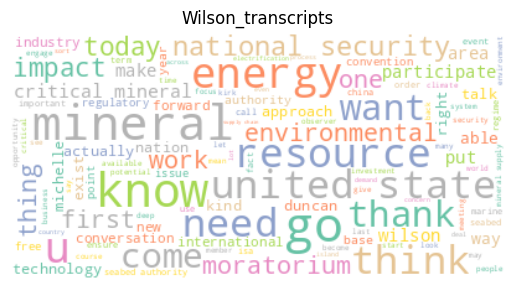

0.3840520748576078


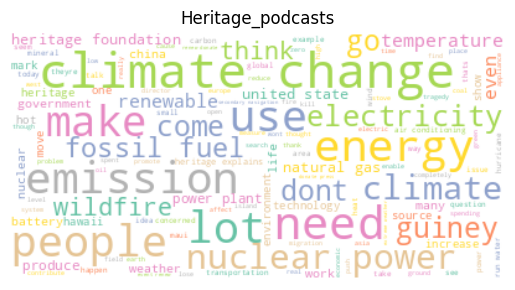

0.4369565217391304


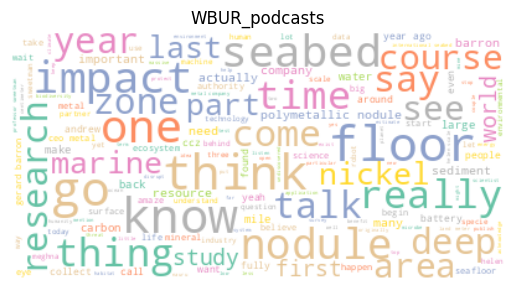

0.40653061224489795


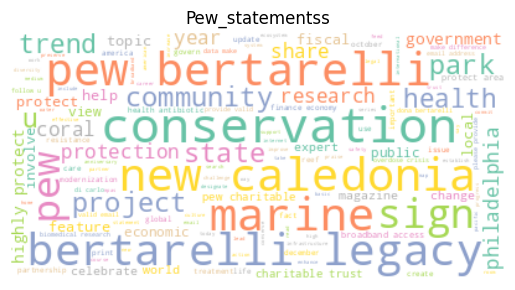

0.3782258064516129


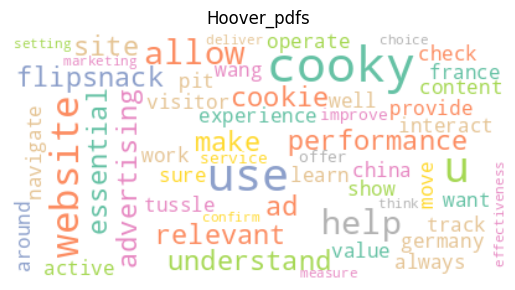

0.6352941176470588


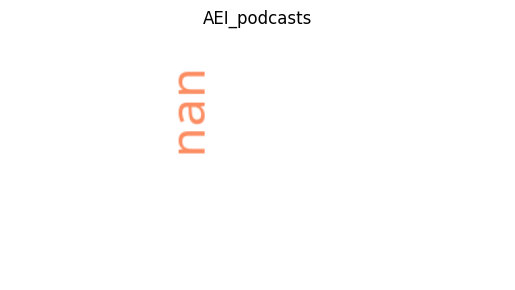

1.0


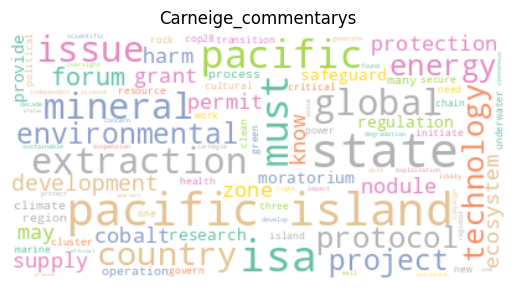

0.653211009174312


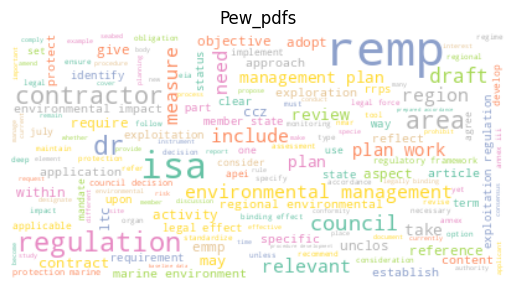

0.33528722157092616


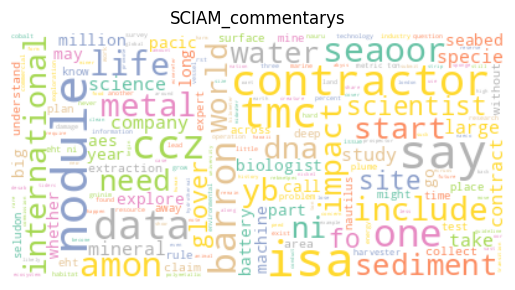

0.5252225519287834


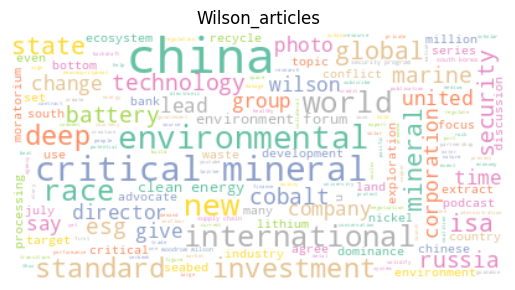

0.608955223880597


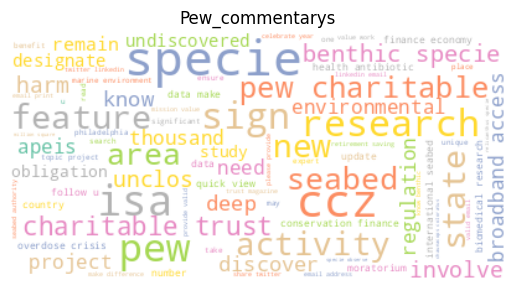

0.2635357463356267


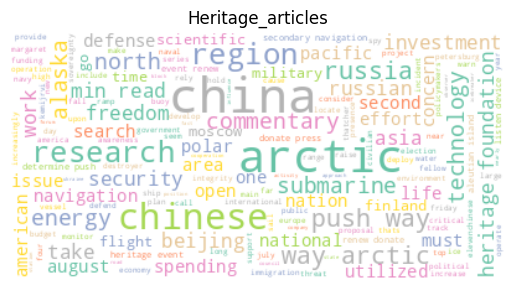

0.6099447513812155


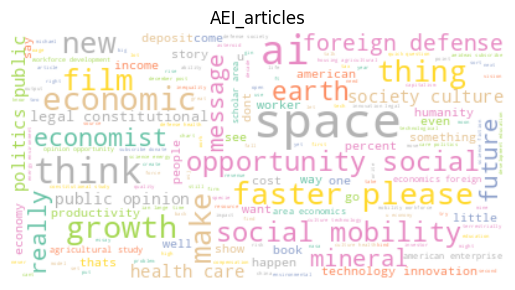

0.3968133535660091


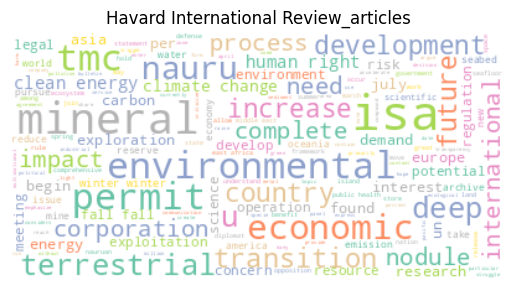

0.5752364574376613


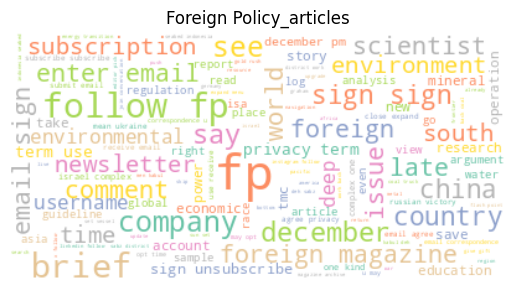

0.41081081081081083


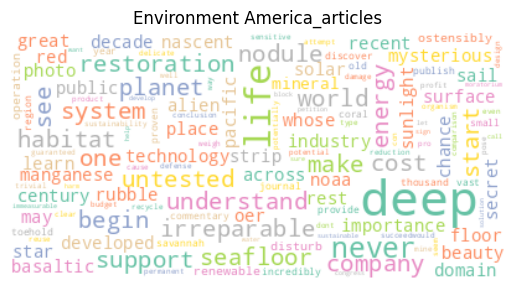

0.7861271676300579


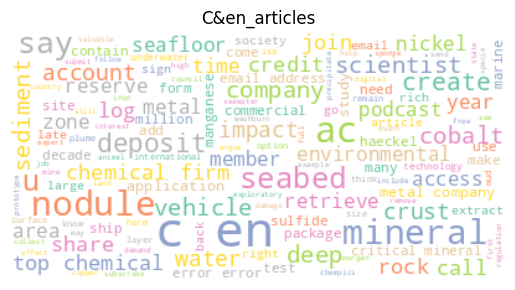

0.4065328610783156


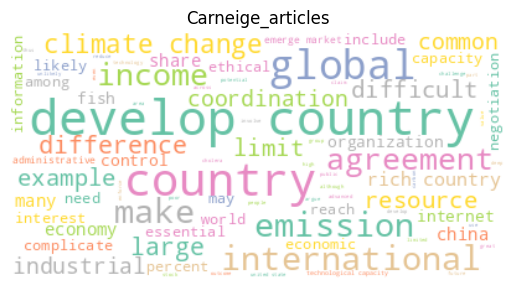

0.5399610136452242


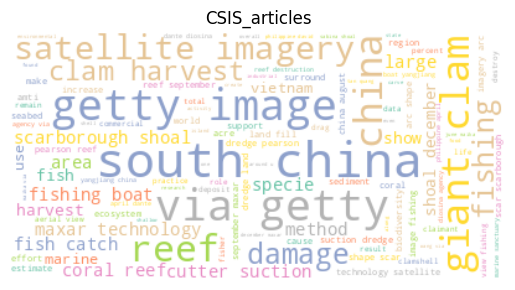

0.2512363996043521


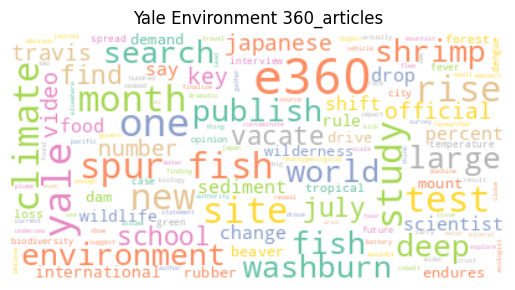

0.6837349397590361


In [122]:
id = 0
lexical_density_clean = []
for filepath in files:
    text = open(filepath, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stops]
    text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]

# save cleaned files
    file_name = filepath.split("/")[-1]
    file_name = file_name.split(".")[0]
    with open(f"/content/drive/MyDrive/Python_Final/yimings/files_cleaned/{file_name}.txt", "w") as file:
        file.write(str(text_clean))

# create Word Clouds

    unique_string=(" ").join(text_clean)
    wordcloud = WordCloud(max_font_size=40, background_color='white', colormap='Set2').generate(unique_string)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(file_name)
    plt.show()

# save Word Clouds
    wordcloud.to_file(f"/content/drive/MyDrive/Python_Final/yimings/wordclouds_clean/wordcloud_{file_name}.png")

# lexical density
    ld_results = len(set(text_clean)) / len(text_clean) # unlike the lecture, I want to analyze the whole text, not just a slice
    print(ld_results)
    ld_dict = {'File_name': file_name, 'lexical_density': ld_results}
    lexical_density_clean.append(ld_dict)

# ***Lexical Densities***

In [123]:
lexical_density

[{'File_name': 'Wilson_transcripts', 'lexical_density': 0.3409578270192995},
 {'File_name': 'Heritage_podcasts', 'lexical_density': 0.43048694424841216},
 {'File_name': 'WBUR_podcasts', 'lexical_density': 0.38744672607516467},
 {'File_name': 'Pew_statementss', 'lexical_density': 0.3633610900832703},
 {'File_name': 'Hoover_pdfs', 'lexical_density': 0.6477272727272727},
 {'File_name': 'AEI_podcasts', 'lexical_density': 1.0},
 {'File_name': 'Carneige_commentarys', 'lexical_density': 0.6206896551724138},
 {'File_name': 'Pew_pdfs', 'lexical_density': 0.3335256780150029},
 {'File_name': 'SCIAM_commentarys', 'lexical_density': 0.5098360655737705},
 {'File_name': 'Wilson_articles', 'lexical_density': 0.5808550185873605},
 {'File_name': 'Pew_commentarys', 'lexical_density': 0.25353706847764573},
 {'File_name': 'Heritage_articles', 'lexical_density': 0.6069114470842333},
 {'File_name': 'AEI_articles', 'lexical_density': 0.38205499276411},
 {'File_name': 'Havard International Review_articles',
  

In [124]:
lexicaldensity_df = pd.DataFrame(lexical_density)
lexicaldensity_df = lexicaldensity_df.sort_values(by='lexical_density', ascending=False)
lexicaldensity_df

File_name  lexical_density
5                           AEI_podcasts         1.000000
15          Environment America_articles         0.712821
19         Yale Environment 360_articles         0.654596
4                            Hoover_pdfs         0.647727
6                   Carneige_commentarys         0.620690
11                     Heritage_articles         0.606911
9                        Wilson_articles         0.580855
13  Havard International Review_articles         0.551555
17                     Carneige_articles         0.534417
8                      SCIAM_commentarys         0.509836
1                      Heritage_podcasts         0.430487
14               Foreign Policy_articles         0.394885
16                         C&en_articles         0.390198
2                          WBUR_podcasts         0.387447
12                          AEI_articles         0.382055
3                        Pew_statementss         0.363361
0                     Wilson_transcripts         0.340958
7                               Pew_pdfs         0.333526
10                       Pew_commentarys         0.253537
18                         CSIS_articles         0.246242

# ***Lexical Densities by Same Publication Type***

Most of the publications have a relatively high lexical density. Pew’s publications contain less information than others. Scientific reports are more informative than other researches.

In [125]:
oped_lexical = lexicaldensity_df[lexicaldensity_df['File_name'].str.contains('podcasts')]
oped_lexical

File_name  lexical_density
5       AEI_podcasts         1.000000
1  Heritage_podcasts         0.430487
2      WBUR_podcasts         0.387447

In [126]:
reports_lexical = lexicaldensity_df[lexicaldensity_df['File_name'].str.contains('articles')]
reports_lexical

File_name  lexical_density
15          Environment America_articles         0.712821
19         Yale Environment 360_articles         0.654596
11                     Heritage_articles         0.606911
9                        Wilson_articles         0.580855
13  Havard International Review_articles         0.551555
17                     Carneige_articles         0.534417
14               Foreign Policy_articles         0.394885
16                         C&en_articles         0.390198
12                          AEI_articles         0.382055
18                         CSIS_articles         0.246242

In [ ]:
reports_lexical = lexicaldensity_df[lexicaldensity_df['File_name'].str.contains('commentarys')]
reports_lexical

File_name  lexical_density
6   Carneige_commentarys         0.620690
8      SCIAM_commentarys         0.509836
10       Pew_commentarys         0.253537

In [ ]:
reports_lexical = lexicaldensity_df[lexicaldensity_df['File_name'].str.contains('statementss')]
reports_lexical

File_name  lexical_density
3  Pew_statementss         0.363361

In [ ]:
reports_lexical = lexicaldensity_df[lexicaldensity_df['File_name'].str.contains('pdfs')]
reports_lexical

File_name  lexical_density
4  Hoover_pdfs         0.647727
7     Pew_pdfs         0.333526

In [ ]:
reports_lexical = lexicaldensity_df[lexicaldensity_df['File_name'].str.contains('transcripts')]
reports_lexical

File_name  lexical_density
0  Wilson_transcripts         0.340958

# ***TF-IDF***

Conducting TF-IDF Analysis to determine key words in each think tank when argueing about DSM.

I looked at key words such as 'security', 'critical', 'conservation', 'environment', 'community',  'economic', 'development', 'rights’ and tried to see if institutes’ political tendency align with their arguments on DSM.

Heritage Foundation especially stressed Security, Pew stressed on conservation, Wilson stressed on critical minerals, and security. All other institutes do not have significant IF-IDF scores. This result shows that the political tendency of think tanks only reflect partly on their arguments on DSM. Currently, both conservative and liberal think tank talk about national security. Conservatives tend to talk less about conservation, but word “conservation” remains relevant in centrist an liberal think tanks’ publications.



In [127]:
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# initializing TfidVectorizer object
tfidf_vectorizer = TfidfVectorizer(input = 'filename', stop_words = stops)
type(tfidf_vectorizer)
text_titles = [Path(text).stem for text in files]
text_titles

['Wilson_transcripts',
 'Heritage_podcasts',
 'WBUR_podcasts',
 'Pew_statementss',
 'Hoover_pdfs',
 'AEI_podcasts',
 'Carneige_commentarys',
 'Pew_pdfs',
 'SCIAM_commentarys',
 'Wilson_articles',
 'Pew_commentarys',
 'Heritage_articles',
 'AEI_articles',
 'Havard International Review_articles',
 'Foreign Policy_articles',
 'Environment America_articles',
 'C&en_articles',
 'Carneige_articles',
 'CSIS_articles',
 'Yale Environment 360_articles']

In [128]:
# creating a dataframe of each term's tf-idf score for each file
tfidf_vector = tfidf_vectorizer.fit_transform(files)
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index = text_titles, columns = tfidf_vectorizer.get_feature_names_out()) #array format dataaset
tfidf_df

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['brien', 'carlo', 'deep', 'di', 'furchtgott', 'isa', 'roth', 'sign', 'un'] not in stop_words.
  warnings.warn(


00       000     00010     00080  \
Wilson_transcripts                    0.000000  0.000000  0.000000  0.000000   
Heritage_podcasts                     0.000000  0.009272  0.000000  0.000000   
WBUR_podcasts                         0.000000  0.035326  0.000000  0.000000   
Pew_statementss                       0.000000  0.009286  0.000000  0.000000   
Hoover_pdfs                           0.000000  0.000000  0.000000  0.000000   
AEI_podcasts                          0.000000  0.000000  0.000000  0.000000   
Carneige_commentarys                  0.000000  0.000000  0.000000  0.000000   
Pew_pdfs                              0.000000  0.005140  0.000000  0.000000   
SCIAM_commentarys                     0.000000  0.045385  0.000000  0.000000   
Wilson_articles                       0.000000  0.045222  0.000000  0.000000   
Pew_commentarys                       0.000000  0.000000  0.000000  0.000000   
Heritage_articles                     0.000000  0.000000  0.000000  0.000000   
AEI_articles                          0.000000  0.000000  0.000000  0.000000   
Havard International Review_articles  0.000000  0.000000  0.000000  0.000000   
Foreign Policy_articles               0.037019  0.006414  0.000000  0.000000   
Environment America_articles          0.000000  0.000000  0.000000  0.000000   
C&en_articles                         0.000000  0.033111  0.010617  0.010617   
Carneige_articles                     0.000000  0.000000  0.000000  0.000000   
CSIS_articles                         0.000000  0.006125  0.000000  0.000000   
Yale Environment 360_articles         0.000000  0.000000  0.000000  0.000000   

                                          0009       008        01        02  \
Wilson_transcripts                    0.000000  0.000000  0.000000  0.000000   
Heritage_podcasts                     0.000000  0.000000  0.000000  0.000000   
WBUR_podcasts                         0.000000  0.000000  0.000000  0.000000   
Pew_statementss                       0.000000  0.000000  0.000000  0.000000   
Hoover_pdfs                           0.000000  0.000000  0.000000  0.000000   
AEI_podcasts                          0.000000  0.000000  0.000000  0.000000   
Carneige_commentarys                  0.000000  0.000000  0.000000  0.000000   
Pew_pdfs                              0.000000  0.000000  0.000000  0.000000   
SCIAM_commentarys                     0.000000  0.014553  0.014553  0.000000   
Wilson_articles                       0.000000  0.000000  0.000000  0.000000   
Pew_commentarys                       0.000000  0.000000  0.000000  0.000000   
Heritage_articles                     0.000000  0.000000  0.000000  0.000000   
AEI_articles                          0.000000  0.000000  0.000000  0.009087   
Havard International Review_articles  0.000000  0.000000  0.000000  0.000000   
Foreign Policy_articles               0.000000  0.000000  0.000000  0.000000   
Environment America_articles          0.000000  0.000000  0.000000  0.000000   
C&en_articles                         0.010617  0.000000  0.000000  0.000000   
Carneige_articles                     0.000000  0.000000  0.000000  0.000000   
CSIS_articles                         0.000000  0.000000  0.000000  0.000000   
Yale Environment 360_articles         0.000000  0.000000  0.000000  0.000000   

                                          0200       021  ...   zachary  \
Wilson_transcripts                    0.000000  0.000000  ...  0.000000   
Heritage_podcasts                     0.000000  0.000000  ...  0.000000   
WBUR_podcasts                         0.000000  0.000000  ...  0.000000   
Pew_statementss                       0.000000  0.000000  ...  0.000000   
Hoover_pdfs                           0.000000  0.000000  ...  0.000000   
AEI_podcasts                          0.000000  0.000000  ...  0.000000   
Carneige_commentarys                  0.000000  0.000000  ...  0.000000   
Pew_pdfs                              0.000000  0.000000  ...  0.000000   
SCIAM_c

In [ ]:
tfidf_df.to_csv('/content/drive/MyDrive/Python_Final/yimings/tfidf_df.csv')

In [129]:
tfidf_slice = tfidf_df[['security', 'critical', 'conservation', 'environment', 'community',  'economic', 'development', 'rights']]
tfidf_slice.sort_index().round(decimals = 2)

security  critical  conservation  \
AEI_articles                              0.00      0.01          0.00   
AEI_podcasts                              0.00      0.00          0.00   
C&en_articles                             0.00      0.03          0.00   
CSIS_articles                             0.00      0.01          0.00   
Carneige_articles                         0.00      0.02          0.00   
Carneige_commentarys                      0.00      0.04          0.00   
Environment America_articles              0.00      0.00          0.00   
Foreign Policy_articles                   0.01      0.01          0.00   
Havard International Review_articles      0.02      0.00          0.00   
Heritage_articles                         0.06      0.02          0.00   
Heritage_podcasts                         0.01      0.01          0.00   
Hoover_pdfs                               0.00      0.00          0.00   
Pew_commentarys                           0.00      0.02          0.16   
Pew_pdfs                                  0.00      0.00          0.01   
Pew_statementss                           0.00      0.00          0.20   
SCIAM_commentarys                         0.00      0.00          0.02   
WBUR_podcasts                             0.00      0.01          0.01   
Wilson_articles                           0.14      0.18          0.04   
Wilson_transcripts                        0.17      0.11          0.00   
Yale Environment 360_articles             0.00      0.00          0.00   

                                      environment  community  economic  \
AEI_articles                                 0.03       0.01      0.06   
AEI_podcasts                                 0.00       0.00      0.00   
C&en_articles                                0.03       0.01      0.00   
CSIS_articles                                0.02       0.00      0.01   
Carneige_articles                            0.01       0.01      0.04   
Carneige_commentarys                         0.00       0.02      0.02   
Environment America_articles                 0.00       0.00      0.00   
Foreign Policy_articles                      0.03       0.00      0.01   
Havard International Review_articles         0.03       0.00      0.08   
Heritage_articles                            0.02       0.00      0.01   
Heritage_podcasts                            0.03       0.00      0.02   
Hoover_pdfs                                  0.00       0.00      0.00   
Pew_commentarys                              0.03       0.01      0.05   
Pew_pdfs                                     0.03       0.00      0.00   
Pew_statementss                              0.01       0.01      0.04   
SCIAM_commentarys                            0.01       0.00      0.00   
WBUR_podcasts                                0.02       0.00      0.01   
Wilson_articles                              0.07       0.00      0.01   
Wilson_transcripts                           0.03       0.01      0.00   
Yale Environment 360_articles                0.06       0.00      0.00   

                                      development  rights  
AEI_articles                                 0.05    0.00  
AEI_podcasts                                 0.00    0.00  
C&en_articles                                0.00    0.01  
CSIS_articles                                0.00    0.00  
Carneige_articles                            0.00    0.01  
Carneige_commentarys                         0.08    0.00  
Environment America_articles                 0.00    0.00  
Foreign Policy_articles                      0.00    0.02  
Havard International Review_articles         0.08    0.06  
Heritage_articles                            0.00    0.00  
Heritage_podcasts                            0.00    0.00  
Hoover_pdfs                                  0.00    0.00  
Pew_commentarys                              0.01    0.01  
Pew_pdfs                                     0.02    0.01  
Pew_statementss             

In [ ]:
# this is creating a row for each term for document tuype
tfidf_df_long = tfidf_df.stack().reset_index()
tfidf_df_long = tfidf_df_long.rename(columns={0:'tfidf', 'level_0': 'document type','level_1': 'term'})
tfidf_df_long

document type        term  tfidf
0                  Wilson_transcripts          00    0.0
1                  Wilson_transcripts         000    0.0
2                  Wilson_transcripts       00010    0.0
3                  Wilson_transcripts       00080    0.0
4                  Wilson_transcripts        0009    0.0
...                               ...         ...    ...
138195  Yale Environment 360_articles        zhao    0.0
138196  Yale Environment 360_articles        zinc    0.0
138197  Yale Environment 360_articles        zone    0.0
138198  Yale Environment 360_articles       zones    0.0
138199  Yale Environment 360_articles  zonesocean    0.0

[138200 rows x 3 columns]

In [ ]:
# pulling the top 10 tf-idf's for each document type
top_tfidf = tfidf_df_long.sort_values(by = ['document type', 'tfidf'], ascending = [True, False]).groupby(['document type']).head(10)
top_tfidf

# ***Comparing Top TF-IDF Values for procasts***

In [130]:
top_tfidf[top_tfidf['document type'] == 'Heritage_podcasts']

document type         term     tfidf
11135  Heritage_podcasts      nuclear  0.257662
9085   Heritage_podcasts    emissions  0.226020
9643   Heritage_podcasts   furchtgott  0.216566
12234  Heritage_podcasts         roth  0.216566
8103   Heritage_podcasts      climate  0.191782
11614  Heritage_podcasts        power  0.186209
9832   Heritage_podcasts       guiney  0.180471
9052   Heritage_podcasts  electricity  0.174501
13649  Heritage_podcasts      weather  0.162424
13706  Heritage_podcasts    wildfires  0.144377

In [131]:
top_tfidf[top_tfidf['document type'] == 'WBUR_podcasts']

document type         term     tfidf
14894  WBUR_podcasts  chakrabarti  0.222182
18003  WBUR_podcasts      nodules  0.203794
14540  WBUR_podcasts       barron  0.176229
17771  WBUR_podcasts       mining  0.145862
19281  WBUR_podcasts          sea  0.144029
16824  WBUR_podcasts        helen  0.143765
20063  WBUR_podcasts        think  0.142656
16434  WBUR_podcasts        floor  0.136876
18822  WBUR_podcasts       really  0.131778
19282  WBUR_podcasts       seabed  0.130298

# ***Comparing Top TF-IDF Values for articals***

In [132]:
top_tfidf[top_tfidf['document type'] == 'Environment America_articles']

document type         term     tfidf
105345  Environment America_articles         deep  0.313436
109111  Environment America_articles          sea  0.313436
107601  Environment America_articles       mining  0.190115
107274  Environment America_articles         life  0.182642
107316  Environment America_articles        lived  0.165480
108874  Environment America_articles  restoration  0.165480
110194  Environment America_articles     untested  0.165480
107800  Environment America_articles        never  0.155434
107009  Environment America_articles  irreparable  0.131255
107916  Environment America_articles        ocean  0.125608

In [133]:
top_tfidf[top_tfidf['document type'] == 'Yale Environment 360_articles']

document type      term     tfidf
133343  Yale Environment 360_articles      e360  0.391966
135241  Yale Environment 360_articles    mining  0.257325
138164  Yale Environment 360_articles      yale  0.244979
133874  Yale Environment 360_articles      fish  0.230542
132985  Yale Environment 360_articles      deep  0.168732
137485  Yale Environment 360_articles      test  0.142400
136941  Yale Environment 360_articles    shrimp  0.129204
138006  Yale Environment 360_articles  washburn  0.129204
135304  Yale Environment 360_articles     month  0.122724
136573  Yale Environment 360_articles      rise  0.122724

In [134]:
top_tfidf[top_tfidf['document type'] == 'Havard International Review_articles']

document type    term     tfidf
93781  Havard International Review_articles  mining  0.296944
93194  Havard International Review_articles     isa  0.228242
91525  Havard International Review_articles    deep  0.227339
95291  Havard International Review_articles     sea  0.193659
96122  Havard International Review_articles     tmc  0.174535
96639  Havard International Review_articles  winter  0.146697
89925  Havard International Review_articles    2023  0.123041
89889  Havard International Review_articles    1980  0.122248
94107  Havard International Review_articles     oct  0.107458
93938  Havard International Review_articles   nauru  0.107171

In [135]:
top_tfidf[top_tfidf['document type'] == 'Foreign Policy_articles']

document type      term     tfidf
99426   Foreign Policy_articles        fp  0.642851
99386   Foreign Policy_articles   foreign  0.149821
100691  Foreign Policy_articles    mining  0.135368
98906   Foreign Policy_articles     email  0.127029
99368   Foreign Policy_articles    follow  0.120904
100480  Foreign Policy_articles  magazine  0.114569
102400  Foreign Policy_articles      sign  0.113929
98420   Foreign Policy_articles  december  0.113792
98435   Foreign Policy_articles      deep  0.112781
102201  Foreign Policy_articles       sea  0.112781

# ***Sentiment Analysis***

Sentiment Analysis looks at the compound, positive and negative scores of each publication. The results show that in general, all publications on DSM are positive. Only Yale Environment and CSIS’s 2 publications presented negative tones when talking about “blue scars” and “wildfire”.

In [136]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyzer = SentimentIntensityAnalyzer()

In [137]:
def compound_sentiment(text):
    scores = sentimentAnalyzer.polarity_scores(text)
    compound_scores = scores['compound'] #using compound scores
    return compound_scores
grouped_df['compound_score'] = grouped_df['text'].apply(compound_sentiment)
grouped_df

Publisher        Type  \
18                       Wilson  transcript   
14                          Pew  statements   
10                     Heritage     podcast   
16                         WBUR     podcast   
1                           AEI     podcast   
11                       Hoover         pdf   
13                          Pew         pdf   
5                      Carneige  commentary   
15                        SCIAM  commentary   
12                          Pew  commentary   
17                       Wilson     article   
0                           AEI     article   
9                      Heritage     article   
8   Havard International Review     article   
7                Foreign Policy     article   
6           Environment America     article   
4                      Carneige     article   
3                          CSIS     article   
2                          C&en     article   
19         Yale Environment 360     article   

                                                 text  compound_score  
18  good afternoon everybody thank you so much for...          1.0000  
14  Pew Bertarelli Ocean Legacy Praises New Caledo...          0.9993  
10  What Do Wildfires and Hurricanes Say About Cli...          0.2781  
16  Deep-sea mining: Climate solution or ecologica...          0.9999  
1                                                 nan          0.0000  
11  Deep-sea mining tussle pits France and Germany...          0.9738  
13  This discussion paper has been developed by th...          0.9995  
5   As COP28 approaches, Pacific Island officials ...          0.9931  
15  Mining the seaoor could boost global productio...          0.9980  
12  Seabed Mining Moratorium Is Legally Required b...          0.9999  
17   China Leads the Race to the Bottom: Deep Sea ...          0.9954  
0   A Few Quick Questions for  Economist Ian Lange...          1.0000  
9   China Is Determined To Push Its Way Into the A...          0.9965  
8   Deep Sea Mining and the Green Transition US Eu...          0.9979  
7   Deep-Sea Mining: Will ISA Regulatory Deadline ...          0.9964  
6   The deep sea is one of the most mysterious pla...          0.9656  
4   Over the next few decades, emerging markets wi...          0.9988  
3   Deep Blue Scars: Environmental Threats to the ...         -0.9992  
2   The deep-sea mining dilemma Advertisement ACS ...          0.9995  
19  Deep-Sea Mining Spurs Fish to Vacate Mining Si...         -0.2598

In [ ]:
def positive_sentiment(text):
    scores = sentimentAnalyzer.polarity_scores(text)
    positive_scores = scores['pos'] #using compound scores
    return positive_scores
# this function was taken from lecture
def negative_sentiment(text):
    scores = sentimentAnalyzer.polarity_scores(text)
    negative_scores = scores['neg'] #using compound scores
    return negative_scores
grouped_df['positive_score'] = grouped_df['text'].apply(positive_sentiment)
grouped_df['negative_score'] = grouped_df['text'].apply(negative_sentiment)

In [ ]:
grouped_df = grouped_df.sort_values(by='positive_score', ascending=False)
grouped_df

Publisher        Type  \
11                       Hoover         pdf   
0                           AEI     article   
4                      Carneige     article   
18                       Wilson  transcript   
12                          Pew  commentary   
14                          Pew  statements   
8   Havard International Review     article   
5                      Carneige  commentary   
6           Environment America     article   
2                          C&en     article   
17                       Wilson     article   
9                      Heritage     article   
10                     Heritage     podcast   
16                         WBUR     podcast   
13                          Pew         pdf   
7                Foreign Policy     article   
15                        SCIAM  commentary   
19         Yale Environment 360     article   
3                          CSIS     article   
1                           AEI     podcast   

                                                 text  compound_score  \
11  Deep-sea mining tussle pits France and Germany...          0.9738   
0   A Few Quick Questions for  Economist Ian Lange...          1.0000   
4   Over the next few decades, emerging markets wi...          0.9988   
18  good afternoon everybody thank you so much for...          1.0000   
12  Seabed Mining Moratorium Is Legally Required b...          0.9999   
14  Pew Bertarelli Ocean Legacy Praises New Caledo...          0.9993   
8   Deep Sea Mining and the Green Transition US Eu...          0.9979   
5   As COP28 approaches, Pacific Island officials ...          0.9931   
6   The deep sea is one of the most mysterious pla...          0.9656   
2   The deep-sea mining dilemma Advertisement ACS ...          0.9995   
17   China Leads the Race to the Bottom: Deep Sea ...          0.9954   
9   China Is Determined To Push Its Way Into the A...          0.9965   
10  What Do Wildfires and Hurricanes Say About Cli...          0.2781   
16  Deep-sea mining: Climate solution or ecologica...          0.9999   
13  This discussion paper has been developed by th...          0.9995   
7   Deep-Sea Mining: Will ISA Regulatory Deadline ...          0.9964   
15  Mining the seaoor could boost global productio...          0.9980   
19  Deep-Sea Mining Spurs Fish to Vacate Mining Si...         -0.2598   
3   Deep Blue Scars: Environmental Threats to the ...         -0.9992   
1                                                 nan          0.0000   

    positive_score  negative_score  
11           0.166           0.000  
0            0.148           0.060  
4            0.142           0.085  
18           0.133           0.034  
12           0.130           0.048  
14           0.126           0.018  
8            0.122           0.073  
5            0.113           0.065  
6            0.109           0.048  
2            0.107           0.059  
17           0.091           0.047  
9            0.085           0.037  
10           0.085           0.075  
16           0.084           0.023  
13           0.078           0.020  
7            0.075           0.051  
15           0.072           0.050  
19           0.048           0.047  
3            0.045           0.066  
1            0.000           0.000

In [ ]:
grouped_df = grouped_df.sort_values(by='negative_score', ascending=False)
grouped_df

Publisher        Type  \
4                      Carneige     article   
10                     Heritage     podcast   
8   Havard International Review     article   
3                          CSIS     article   
5                      Carneige  commentary   
0                           AEI     article   
2                          C&en     article   
7                Foreign Policy     article   
15                        SCIAM  commentary   
12                          Pew  commentary   
6           Environment America     article   
17                       Wilson     article   
19         Yale Environment 360     article   
9                      Heritage     article   
18                       Wilson  transcript   
16                         WBUR     podcast   
13                          Pew         pdf   
14                          Pew  statements   
11                       Hoover         pdf   
1                           AEI     podcast   

                                                 text  compound_score  \
4   Over the next few decades, emerging markets wi...          0.9988   
10  What Do Wildfires and Hurricanes Say About Cli...          0.2781   
8   Deep Sea Mining and the Green Transition US Eu...          0.9979   
3   Deep Blue Scars: Environmental Threats to the ...         -0.9992   
5   As COP28 approaches, Pacific Island officials ...          0.9931   
0   A Few Quick Questions for  Economist Ian Lange...          1.0000   
2   The deep-sea mining dilemma Advertisement ACS ...          0.9995   
7   Deep-Sea Mining: Will ISA Regulatory Deadline ...          0.9964   
15  Mining the seaoor could boost global productio...          0.9980   
12  Seabed Mining Moratorium Is Legally Required b...          0.9999   
6   The deep sea is one of the most mysterious pla...          0.9656   
17   China Leads the Race to the Bottom: Deep Sea ...          0.9954   
19  Deep-Sea Mining Spurs Fish to Vacate Mining Si...         -0.2598   
9   China Is Determined To Push Its Way Into the A...          0.9965   
18  good afternoon everybody thank you so much for...          1.0000   
16  Deep-sea mining: Climate solution or ecologica...          0.9999   
13  This discussion paper has been developed by th...          0.9995   
14  Pew Bertarelli Ocean Legacy Praises New Caledo...          0.9993   
11  Deep-sea mining tussle pits France and Germany...          0.9738   
1                                                 nan          0.0000   

    positive_score  negative_score  
4            0.142           0.085  
10           0.085           0.075  
8            0.122           0.073  
3            0.045           0.066  
5            0.113           0.065  
0            0.148           0.060  
2            0.107           0.059  
7            0.075           0.051  
15           0.072           0.050  
12           0.130           0.048  
6            0.109           0.048  
17           0.091           0.047  
19           0.048           0.047  
9            0.085           0.037  
18           0.133           0.034  
16           0.084           0.023  
13           0.078           0.020  
14           0.126           0.018  
11           0.166           0.000  
1            0.000           0.000

# ***Conclusion***

The ongoing debates revolve around several key topics, including national security, global development, economic aspects, and the need for increased scientific research.

The prominent keywords and phrases associated with deep sea mining vary across different think tanks. Conservative think tanks, such as the Heritage Foundation and the Wilson Center, focus primarily on the national security aspects of critical minerals. They frequently mention words like "China," "critical minerals," "Arctic competition," "security," and "strategy." On the other hand, science-oriented think tanks emphasize terms like "sea floor," "species," "impact," "conservation," and highlight the importance of "data." Liberal and centrist think tanks discuss regional inequalities, economic aspects, and development impacts, with common keywords including "Pacific island," "developing countries," "global," and "income."

The perspectives of conservative and liberal/centrist think tanks on deep sea mining vary, but not solely based on their political tendencies. For instance, the Heritage Foundation places a strong emphasis on security, while Pew focuses on conservation. The Wilson Center is particularly concerned with critical minerals and security. However, it is worth noting that other institutes do not exhibit significant IF-IDF scores, indicating that political tendencies only partially align with their arguments on deep sea mining. Currently, both conservative and liberal think tanks engage in discussions related to national security, although conservatives tend to place less emphasis on conservation. Nevertheless, the term "conservation" remains relevant in the publications of centrist and liberal think tanks.

In terms of organizations or institutions leading research in this field, the American Enterprise Institute (AEI) and Pew Research stand out. While most institutes prefer articles as their primary publication format, podcasts are also gaining popularity. Noteworthy authors on this topic include James Pethokoukis and Julian Jackson, and the number of publications peaked in July during the ISA negotiation period.

Regarding sentiment analysis, the overall tone of publications on deep sea mining is positive. However, Yale Environment and CSIS have published a couple of articles with negative tones, particularly when discussing "blue scars" and "wildfire."